In [2]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

In [4]:
#cargamos la base de datos limpia 
df=pd.read_csv("Base_limpia.csv")
df

,COBERTURA,ANIO,MES,ESTADO,MUNICIPIO,GRUPO_PRODUCTO,PRODUCTO,UNIDAD_MEDIDA,VOLUMEN,ESTATUS
0,Municipal,2001.0,Enero,Durango,Centro,Metales Industriales No Ferrosos,Zinc,Toneladas,1.0,Cifras Definitivas.
1,Municipal,2001.0,Desconocido,Durango,Concepción del Oro,Metales Preciosos,Oro,Kilogramos,0.1,Cifras Definitivas.
2,Municipal,2001.0,Enero,Durango,Concepción del Oro,Metales Preciosos,Plata,Kilogramos,0.0,Cifras Definitivas.
3,Municipal,2001.0,Enero,Durango,Concepción del Oro,Metales Industriales No Ferrosos,Plomo,Toneladas,5.0,Cifras Definitivas.
4,Desconocido,2001.0,Enero,Durango,Aquila,Metales Preciosos,Oro,Kilogramos,0.6,Cifras Definitivas.
...,...,...,...,...,...,...,...,...,...,...
89586,Municipal,2023.0,Diciembre,Durango,Mazapil,Metales Preciosos,Oro,Kilogramos,168.0,Cifras Preliminares.
89587,Municipal,2023.0,Abril,Sonora,Jiménez del Teul,Metales Industriales No Ferrosos,Zinc,Toneladas,1669.0,Cifras Preliminares.
89588,Municipal,2023.0,Febrero,Aguascalientes,Agua Prieta,Metales Industriales No Ferrosos,Cobre,Toneladas,48.0,Cifras Preliminares.
89589,Municipal,2023.0,Diciembre,Durango,Mazapil,Metales Preciosos,Desconocido,Kilogramos,13285.0,Cifras Preliminares.


EDA

Parte 2:DESCRIPCION DE LOS DATOS 

In [3]:
#Columnas y filas del df
df.shape

(89591, 10)

In [4]:
df.columns

Index(['COBERTURA', 'ANIO', 'MES', 'ESTADO', 'MUNICIPIO', 'GRUPO_PRODUCTO',
       'PRODUCTO', 'UNIDAD_MEDIDA', 'VOLUMEN', 'ESTATUS'],
      dtype='object')

In [5]:
#Tipos de datos de cada columna
df.dtypes

COBERTURA          object
ANIO              float64
MES                object
ESTADO             object
MUNICIPIO          object
GRUPO_PRODUCTO     object
PRODUCTO           object
UNIDAD_MEDIDA      object
VOLUMEN           float64
ESTATUS            object
dtype: object

In [6]:
#Resumen estadistico de las columnas numericas 
df.describe()

,ANIO,VOLUMEN
count,89591.000000,89591.000000
mean,2011.742385,7257.638806
std,6.373227,30647.190946
min,2001.000000,0.000000
25%,2006.000000,2.000000
50%,2012.000000,116.000000
75%,2017.000000,1615.500000
max,2023.000000,536839.000000


In [7]:
#Resumen estadistico de las columnas categoricas
df.value_counts()

COBERTURA    ANIO    MES          ESTADO                           MUNICIPIO       GRUPO_PRODUCTO                    PRODUCTO           UNIDAD_MEDIDA  VOLUMEN  ESTATUS             
Municipal    2003.0  Agosto       Guanajuato                       Charcas         Metales Industriales No Ferrosos  Plomo              Toneladas      3.0      Cifras Definitivas.     3
                     Desconocido  Sinaloa                          Cosalá          Metales Preciosos                 Plata              Kilogramos     0.0      Cifras Definitivas.     3
                     Septiembre   Chihuahua                        Matamoros       Metales Industriales No Ferrosos  Cobre              Toneladas      4.0      Cifras Definitivas.     3
             2006.0  Junio        Michoacán de Ocampo              Sahuaripa       Metales y Minerales Siderúrgicos  Pellets de fierro  Toneladas      0.0      Cifras Definitivas.     3
             2003.0  Febrero      Sonora                           Aconchi 

In [8]:
df["ANIO"].value_counts()

ANIO
2012.0    7062
2013.0    4435
2001.0    4236
2008.0    4101
2007.0    3997
2009.0    3990
2010.0    3982
2011.0    3969
2016.0    3944
2014.0    3934
2005.0    3882
2006.0    3836
2004.0    3674
2015.0    3664
2018.0    3611
2017.0    3604
2002.0    3514
2019.0    3443
2003.0    3404
2020.0    3373
2021.0    3333
2022.0    3306
2023.0    3297
Name: count, dtype: int64

In [9]:
df["ESTADO"].value_counts()

ESTADO
Zacatecas                          13965
Durango                            13598
Chihuahua                          13491
Sonora                              8304
Sinaloa                             4522
Jalisco                             3737
San Luis Potosí                     3308
Coahuila de Zaragoza                3183
México                              3104
Guerrero                            2887
Michoacán de Ocampo                 2876
Desconocido                         2846
Hidalgo                             2361
Oaxaca                              2130
Querétaro                           1252
Guanajuato                          1198
Colima                              1060
Aguascalientes                      1012
Veracruz de Ignacio de la Llave      948
Nayarit                              936
Nuevo León                           780
Tabasco                              571
Baja California                      502
Chiapas                              291
Tamaulipa

In [10]:
df["GRUPO_PRODUCTO"].value_counts()


GRUPO_PRODUCTO
Metales Preciosos                   41411
Metales Industriales No Ferrosos    32142
Minerales No Metálicos               5986
Metales y Minerales Siderúrgicos     5352
Desconocido                          4700
Name: count, dtype: int64

In [11]:
df["PRODUCTO"].value_counts()

PRODUCTO
Plata                   21694
Oro                     19713
Plomo                   12172
Cobre                   11100
Zinc                     8884
Desconocido              4698
Fierro en Extraccion     3626
Azufre                   3181
Barita                   1752
Pellets de fierro        1136
Fluorita                 1055
Coque                     580
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

Parte 2: Visualizacion y distribucion de las variables 

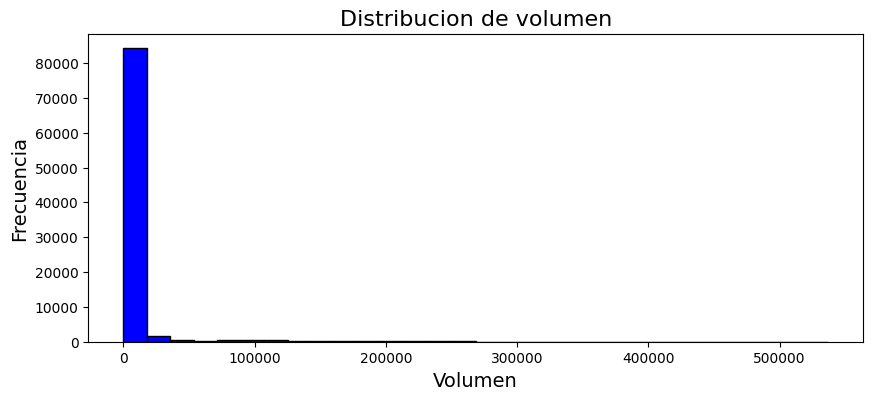

In [12]:
#Histogramas volumen
plt.figure(figsize=(10,4))
plt.hist(df["VOLUMEN"], bins=30, color="blue", edgecolor="black")
plt.title("Distribucion de volumen", fontsize=16)
plt.xlabel("Volumen", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.show()

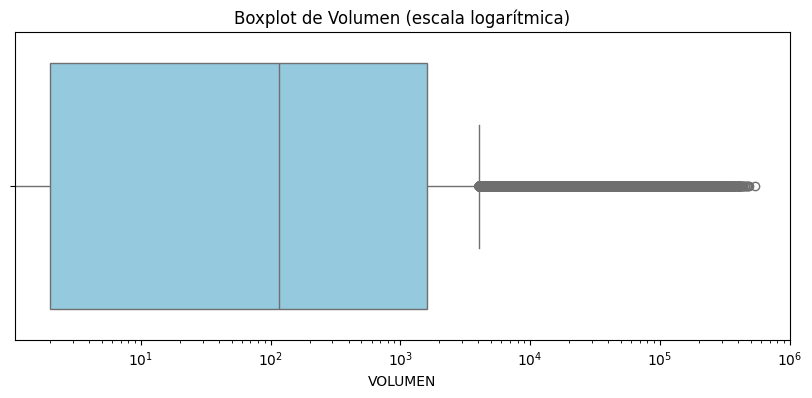

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x='VOLUMEN', data=df, color='skyblue', orient='h')
plt.xscale('log')
plt.title('Boxplot de Volumen (escala logarítmica)')
plt.show()


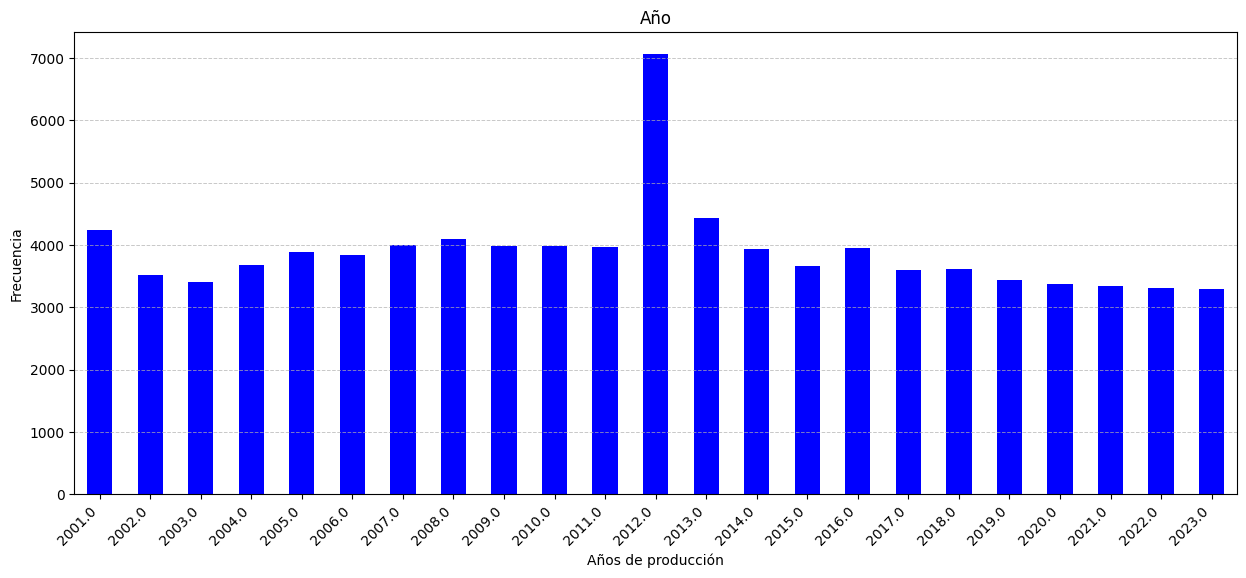

In [14]:
plt.figure(figsize=(15, 6))
df['ANIO'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Año')
plt.xlabel('Años de producción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

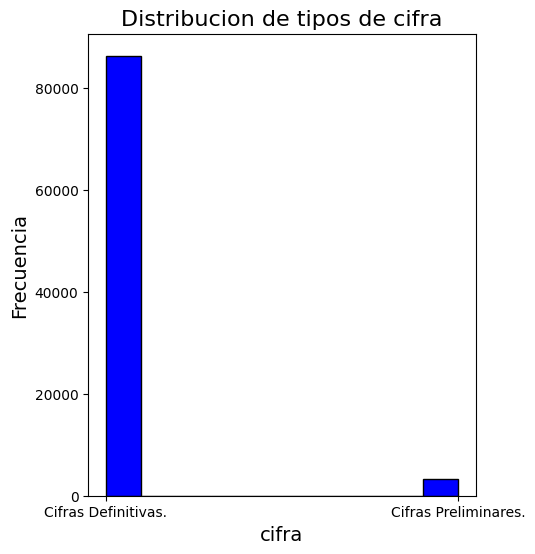

In [8]:
plt.figure(figsize=(5,6))
plt.hist(df["ESTATUS"],bins=10, color="blue",edgecolor="black")
plt.title("Distribucion de tipos de cifra",fontsize=16)
plt.xlabel("cifra", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.show()

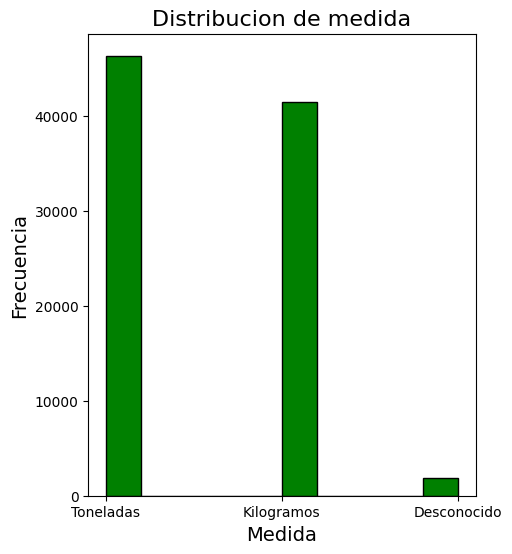

In [7]:
plt.figure(figsize=(5,6))
plt.hist(df["UNIDAD_MEDIDA"],bins=10, color="green",edgecolor="black")
plt.title("Distribucion de medida",fontsize=16)
plt.xlabel("Medida", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.show()

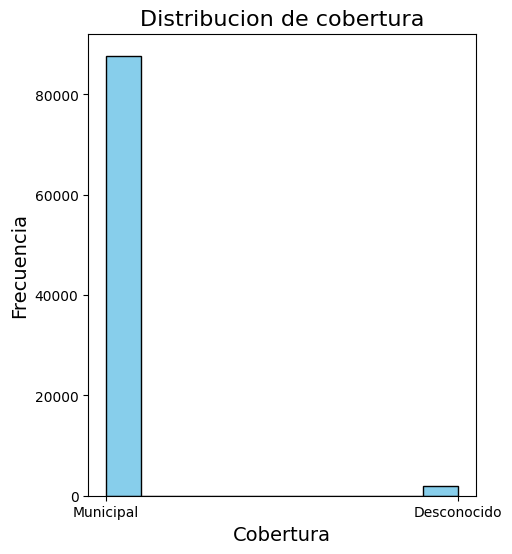

In [17]:
plt.figure(figsize=(5,6))
plt.hist(df["COBERTURA"],bins=10, color="skyblue",edgecolor="black")
plt.title("Distribucion de cobertura",fontsize=16)
plt.xlabel("Cobertura", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.show()

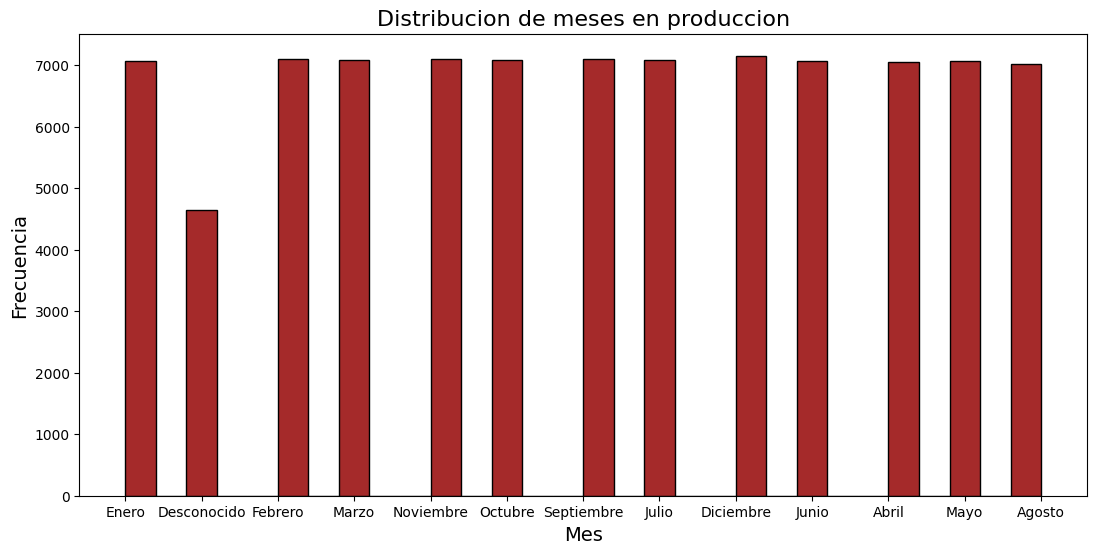

In [9]:
plt.figure(figsize=(13,6))
plt.hist(df["MES"], bins=30, color="brown", edgecolor="black")
plt.title("Distribucion de meses en produccion", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.show()

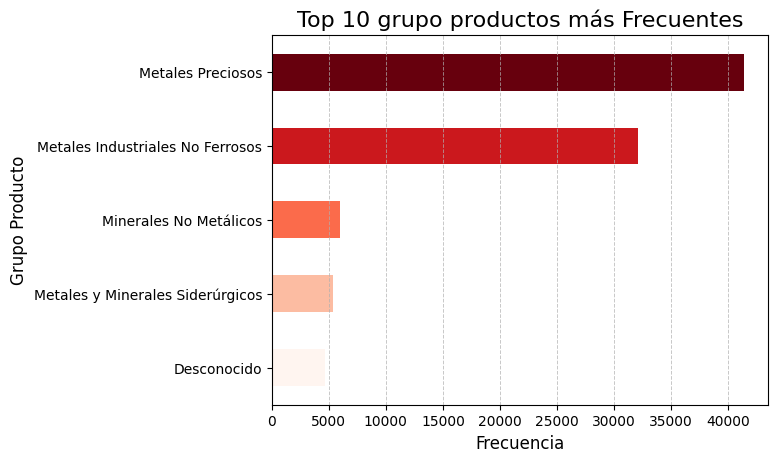

In [10]:
top_10_productos = df["GRUPO_PRODUCTO"].value_counts().nlargest(10)
colors = plt.cm.Reds_r(np.linspace(0, 1, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors)
plt.title('Top 10 grupo productos más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Grupo Producto', fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

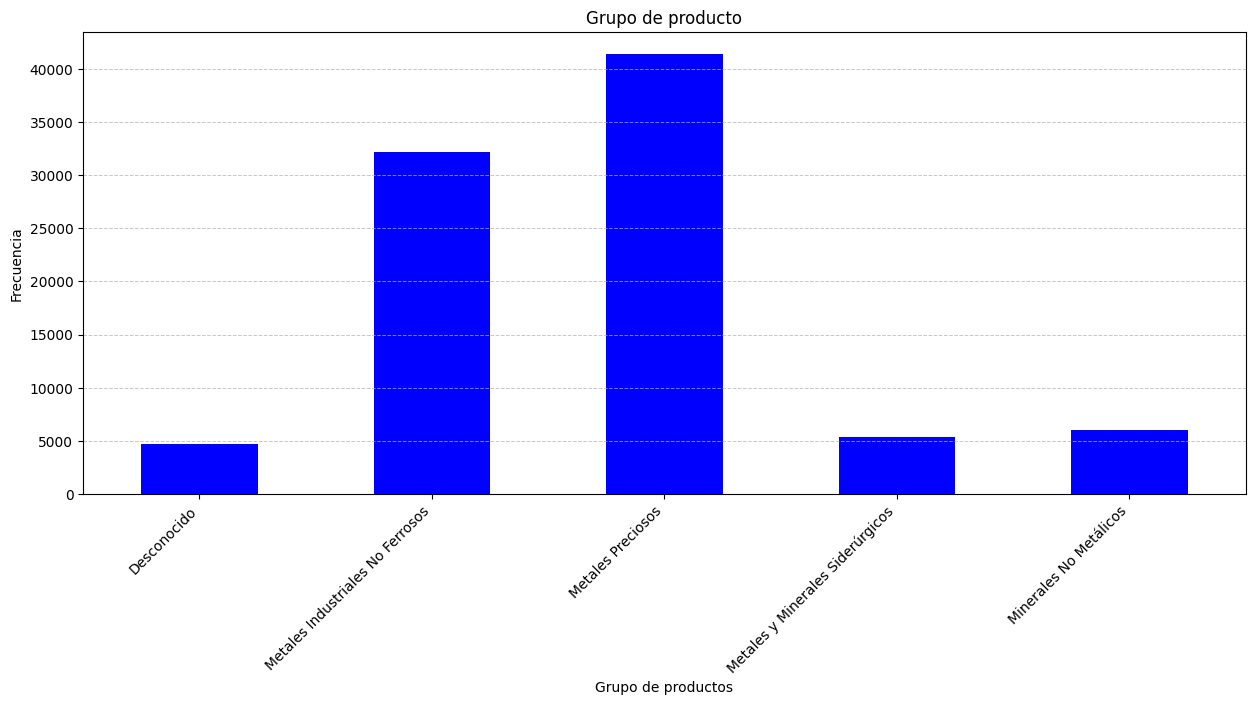

In [20]:
plt.figure(figsize=(15, 6))
df['GRUPO_PRODUCTO'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Grupo de producto')
plt.xlabel('Grupo de productos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

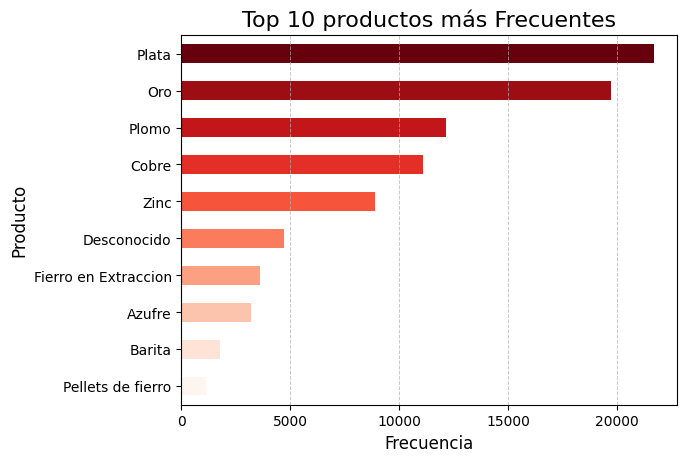

In [21]:
top_10_productos = df["PRODUCTO"].value_counts().nlargest(10)
colors = plt.cm.Reds_r(np.linspace(0, 1, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors)
plt.title('Top 10 productos más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

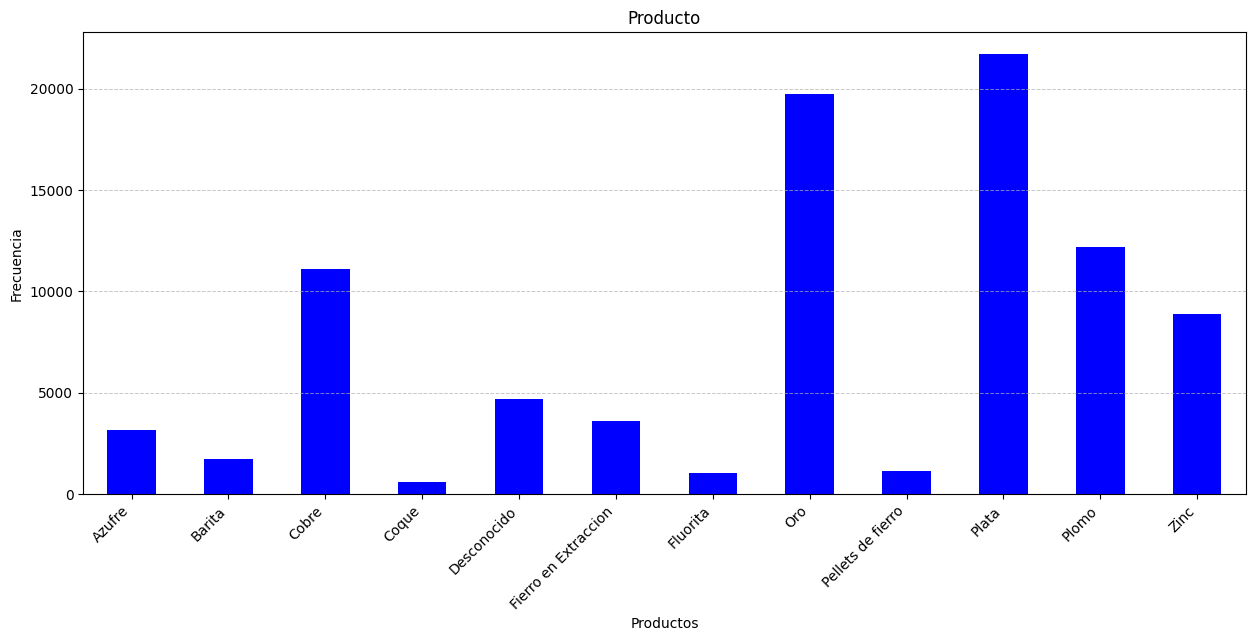

In [22]:
plt.figure(figsize=(15, 6))
df['PRODUCTO'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Producto')
plt.xlabel('Productos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

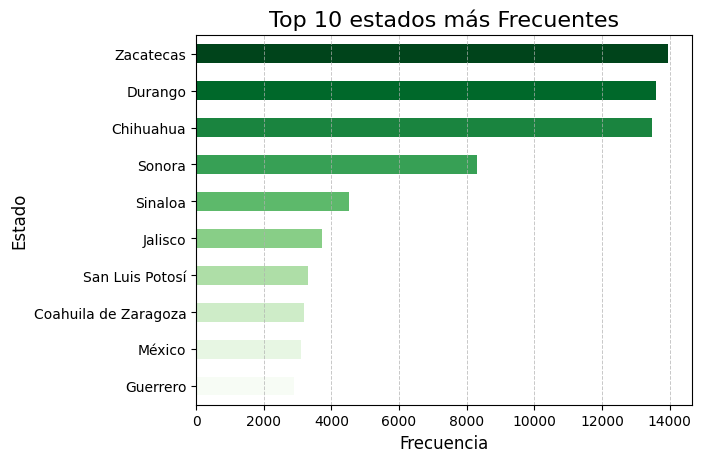

In [11]:
top_10_productos = df["ESTADO"].value_counts().nlargest(10)
colors = plt.cm.Greens_r(np.linspace(0, 1, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors)
plt.title('Top 10 estados más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

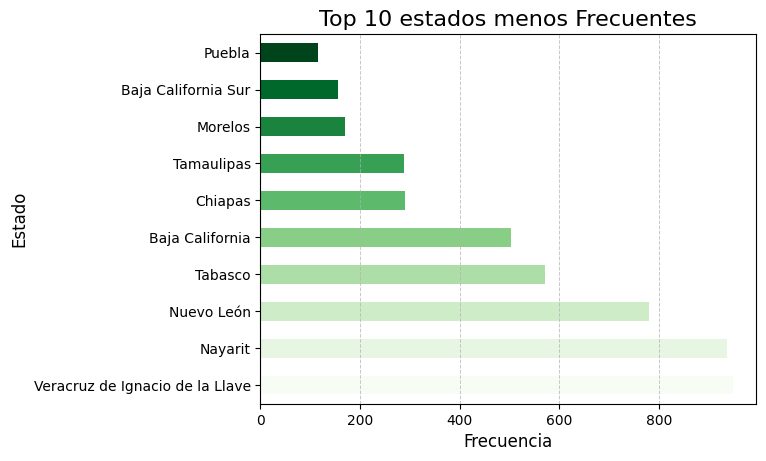

In [12]:
top_10_productos = df["ESTADO"].value_counts().nsmallest(10)
colors = plt.cm.Greens_r(np.linspace(0, 1, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors)
plt.title('Top 10 estados menos Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

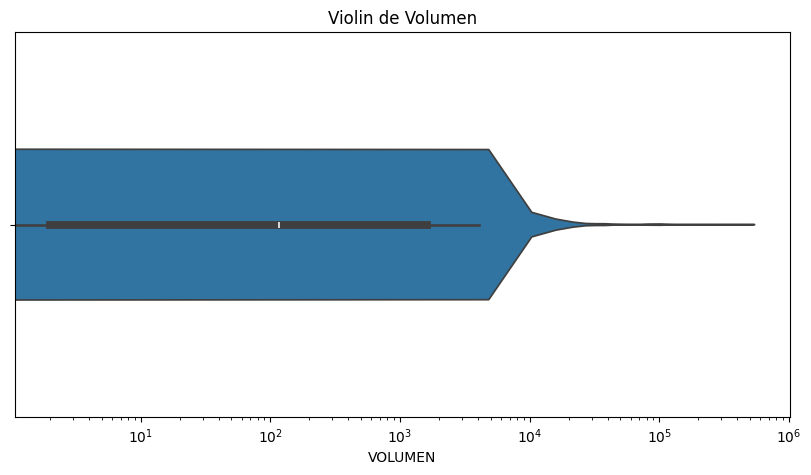

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df["VOLUMEN"])
plt.xscale("log")
plt.title("Violin de Volumen")
plt.show()


In [ ]:
df=df.rename(columns={"ESTADO":"state", "VOLUMEN":"value"})
df["state"]=df["state"].str.title().str.strip()
geo_json_url = "https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json"
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
folium.Choropleth(
    geo_data=geo_json_url,
    name="choropleth",
    data=df,
    columns=["state", "value"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Valor por Estado"
).add_to(m)
folium.LayerControl().add_to(m)
m.save("mapa_mexico.html")
import webbrowser
webbrowser.open("mapa_mexico.html")

True

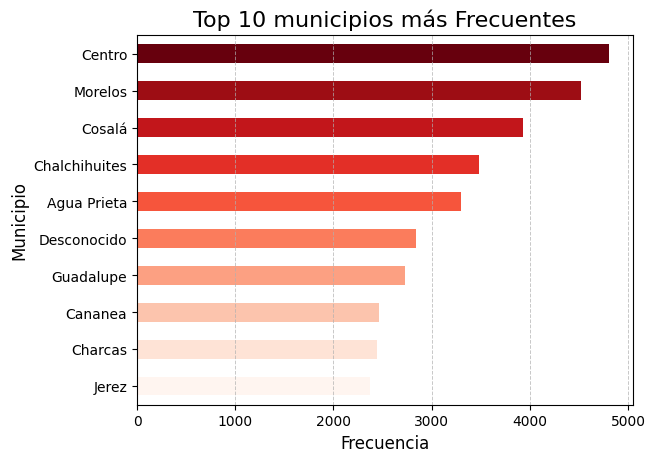

In [14]:
top_10_productos = df["MUNICIPIO"].value_counts().nlargest(10)
colors = plt.cm.Reds_r(np.linspace(0, 1, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors)
plt.title('Top 10 municipios más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Municipio', fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

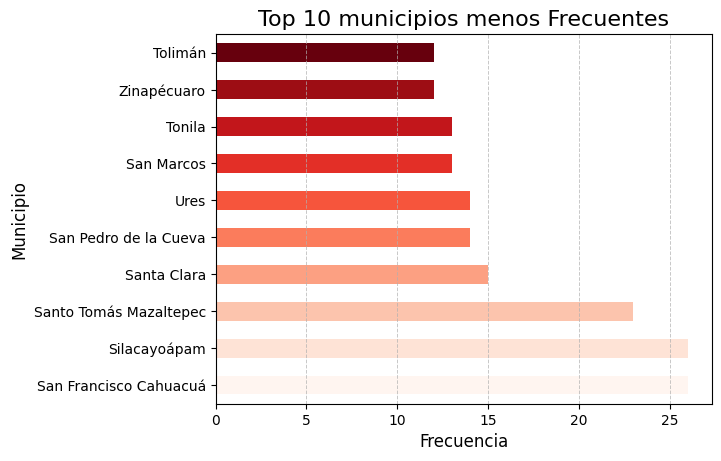

In [15]:
top_10_productos = df["MUNICIPIO"].value_counts().nsmallest(10)
colors = plt.cm.Reds_r(np.linspace(0, 1, len(top_10_productos)))
top_10_productos.plot(kind='barh', color=colors)
plt.title('Top 10 municipios menos Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Municipio', fontsize=12)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Hacer más graficas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89591 entries, 0 to 89590
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COBERTURA       89591 non-null  object 
 1   ANIO            89591 non-null  float64
 2   MES             89591 non-null  object 
 3   state           89591 non-null  object 
 4   MUNICIPIO       89591 non-null  object 
 5   GRUPO_PRODUCTO  89591 non-null  object 
 6   PRODUCTO        89591 non-null  object 
 7   UNIDAD_MEDIDA   89591 non-null  object 
 8   value           89591 non-null  float64
 9   ESTATUS         89591 non-null  object 
dtypes: float64(2), object(8)
memory usage: 6.8+ MB


In [ ]:
df.columns


Index(['COBERTURA', 'ANIO', 'MES', 'state', 'MUNICIPIO', 'GRUPO_PRODUCTO',
       'PRODUCTO', 'UNIDAD_MEDIDA', 'value', 'ESTATUS'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

Parte 3:Matrices de correlacion 

In [ ]:
df_numerico=df[["ANIO", "value"]]
correlation_matrix=df_numerico.corr()
correlation_matrix


,ANIO,value
ANIO,1.000000,0.033774
value,0.033774,1.000000


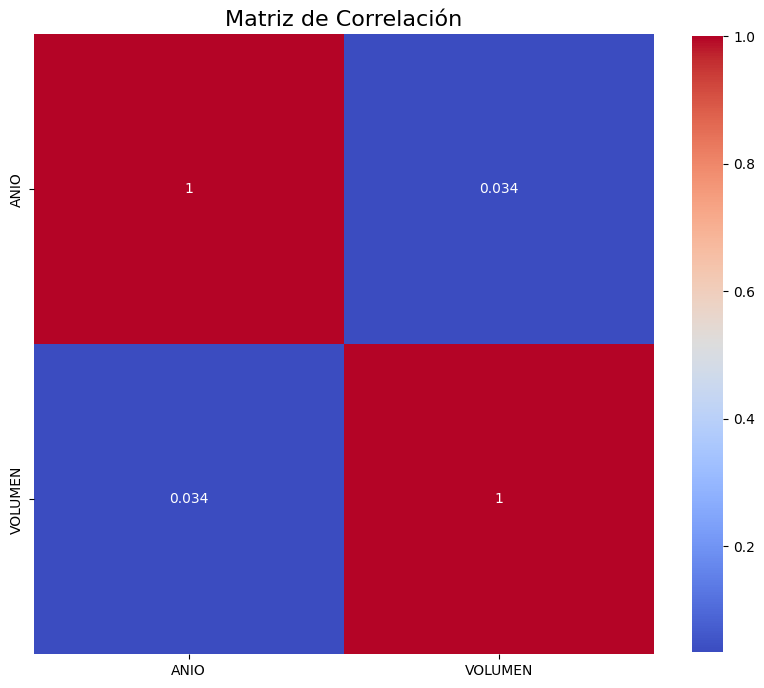

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

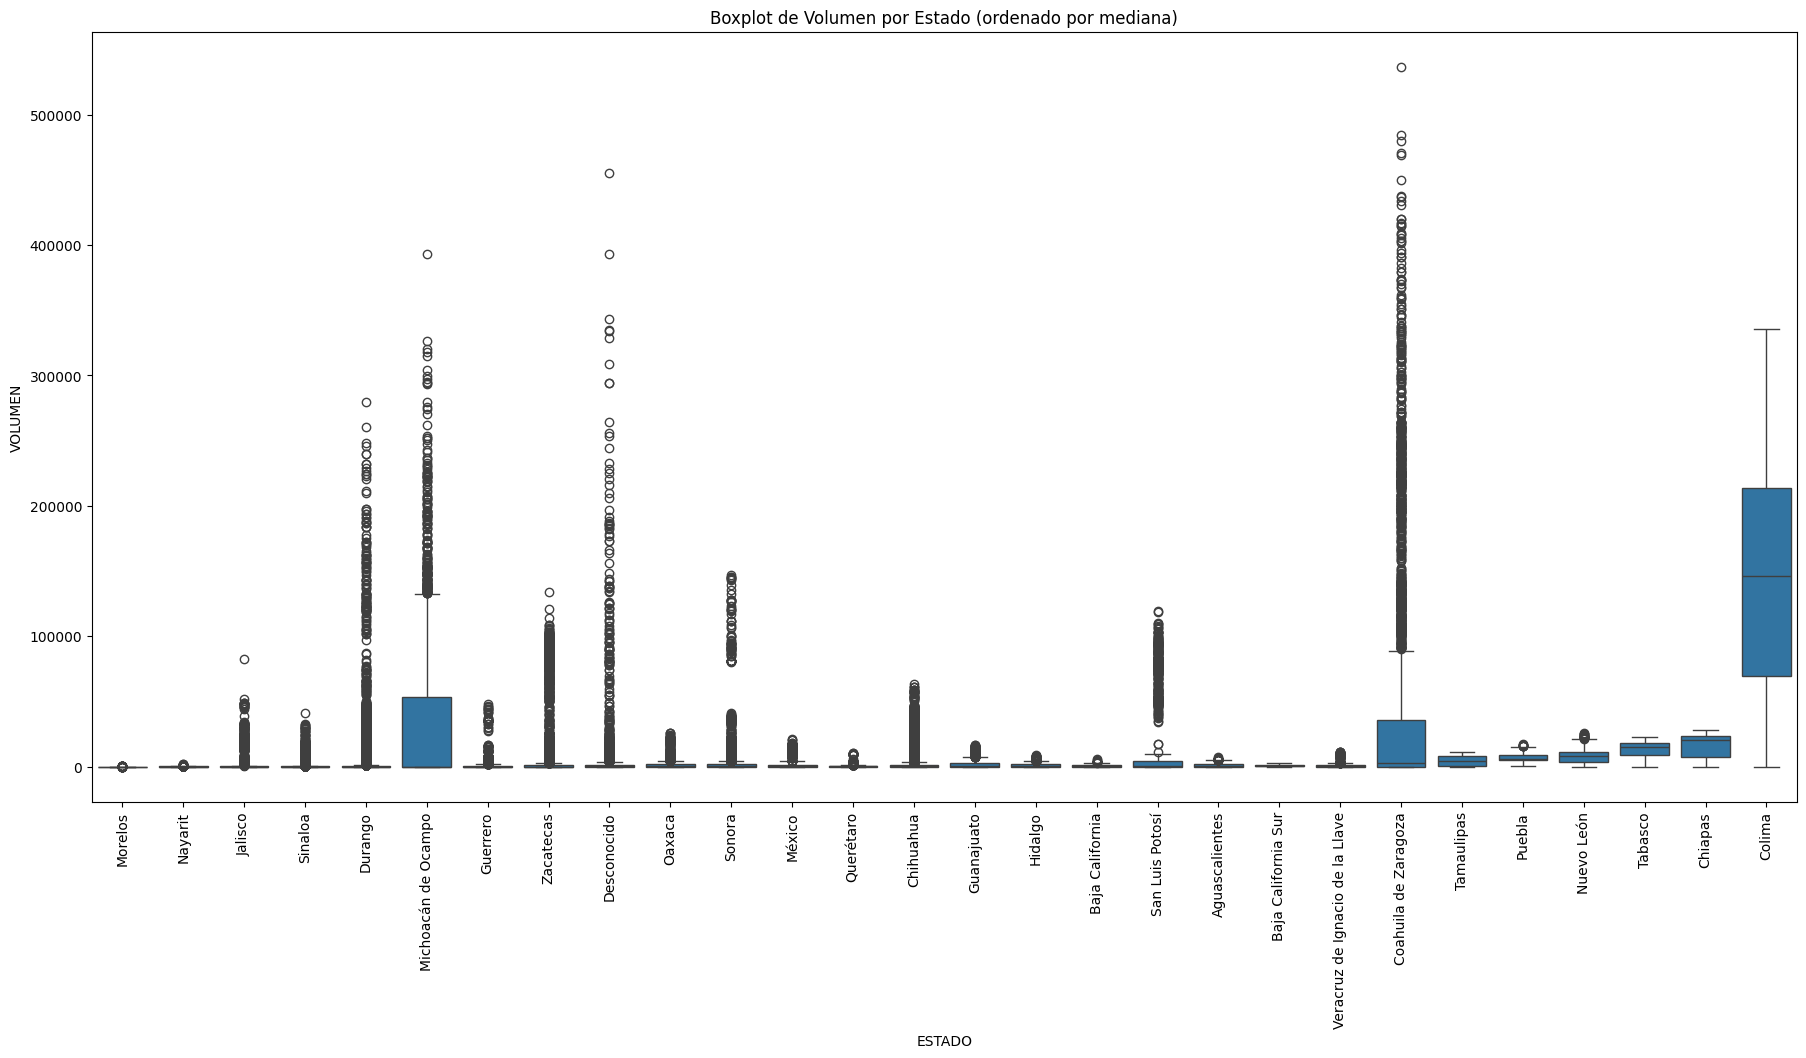

In [ ]:
orden = df.groupby('ESTADO')['VOLUMEN'].median().sort_values().index

plt.figure(figsize=(22,10))
sns.boxplot(data=df, x='ESTADO', y='VOLUMEN', order=orden)
plt.xticks(rotation=90)
plt.title("Boxplot de Volumen por Estado (ordenado por mediana)")
plt.show()


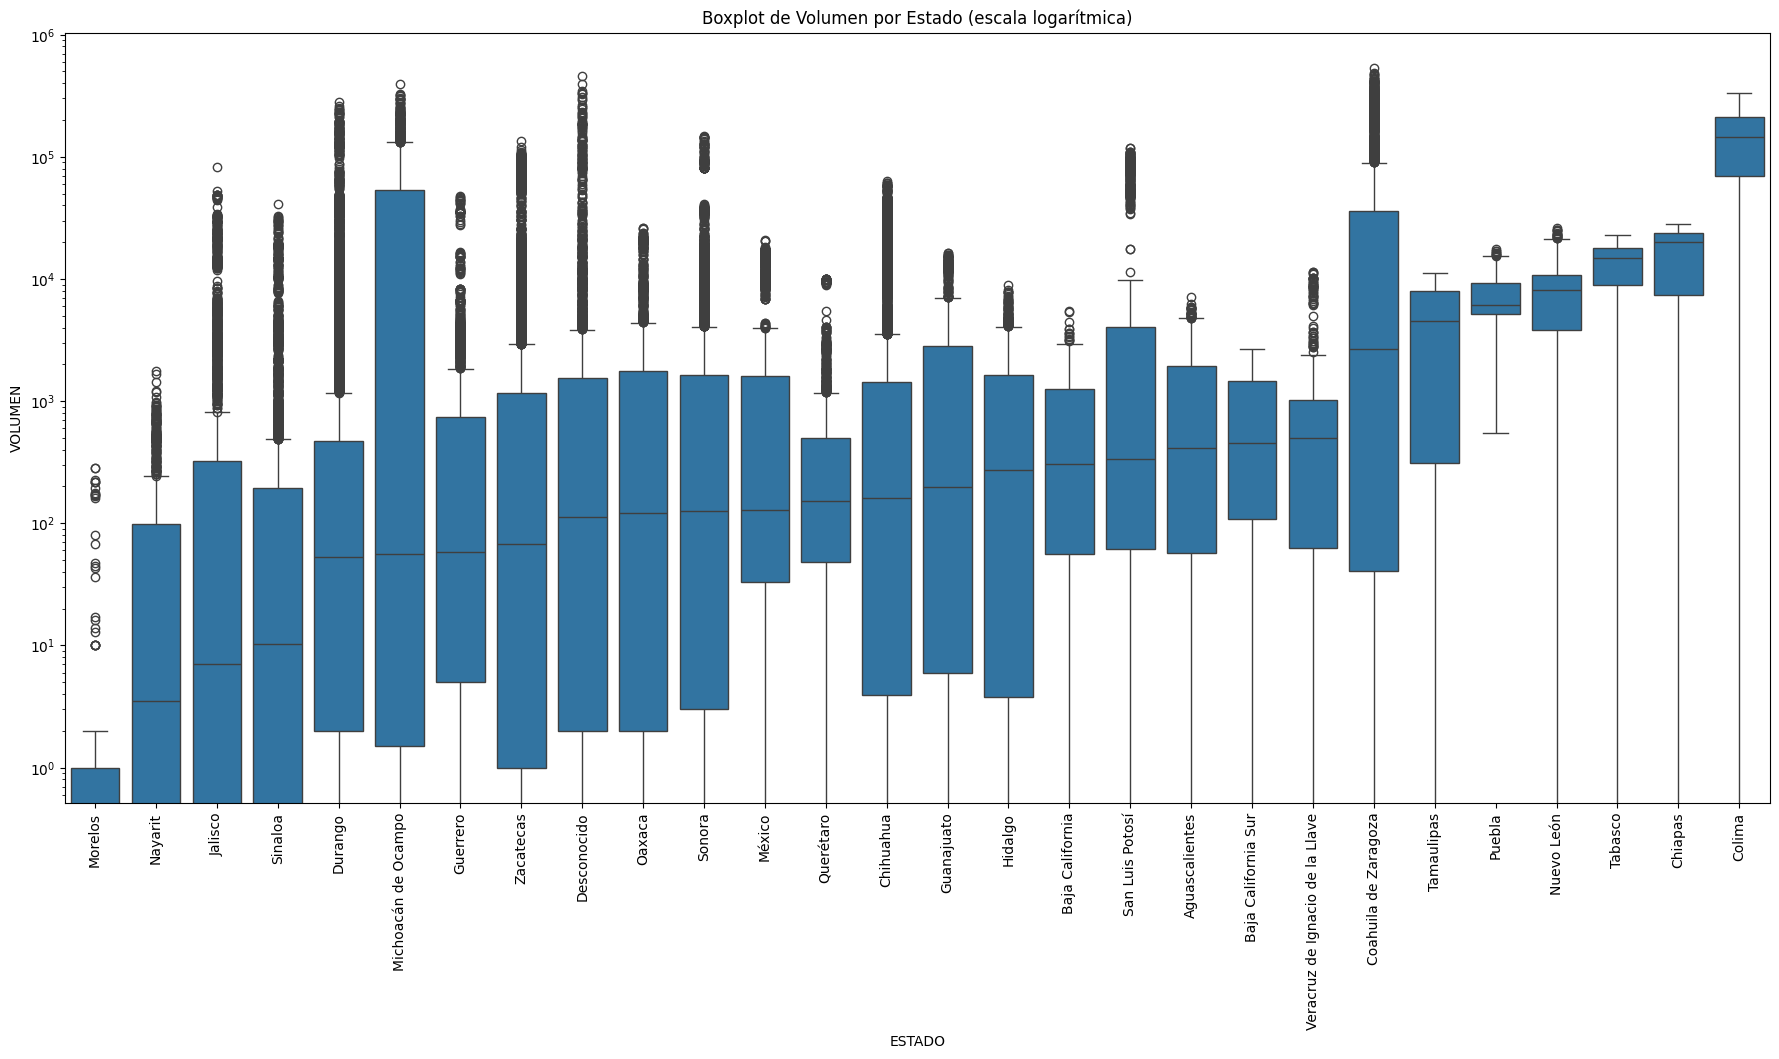

In [ ]:
plt.figure(figsize=(22,10))
sns.boxplot(data=df, x='ESTADO', y='VOLUMEN', order=orden)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title("Boxplot de Volumen por Estado (escala logarítmica)")
plt.show()


C:\Users\lansf\AppData\Local\Temp\ipykernel_15640\849357701.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("MES")["VOLUMEN"].sum().plot(marker="o")


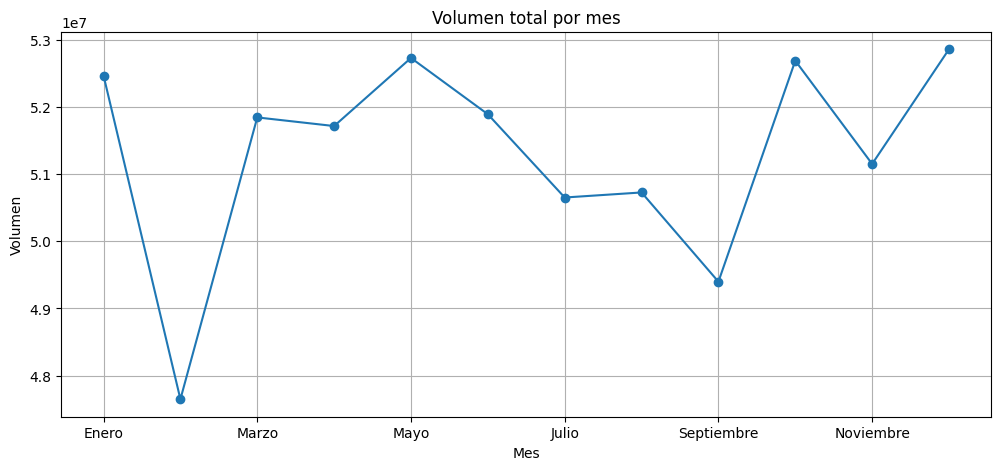

In [ ]:
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df['MES'] = pd.Categorical(df['MES'], categories=orden_meses, ordered=True)

# Gráfica
plt.figure(figsize=(12,5))
df.groupby("MES")["VOLUMEN"].sum().plot(marker="o")
plt.title("Volumen total por mes")
plt.ylabel("Volumen")
plt.xlabel("Mes")
plt.grid(True)
plt.show()


C:\Users\lansf\AppData\Local\Temp\ipykernel_15640\3173987112.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(values="VOLUMEN", index="PRODUCTO", columns="MES", aggfunc="sum")


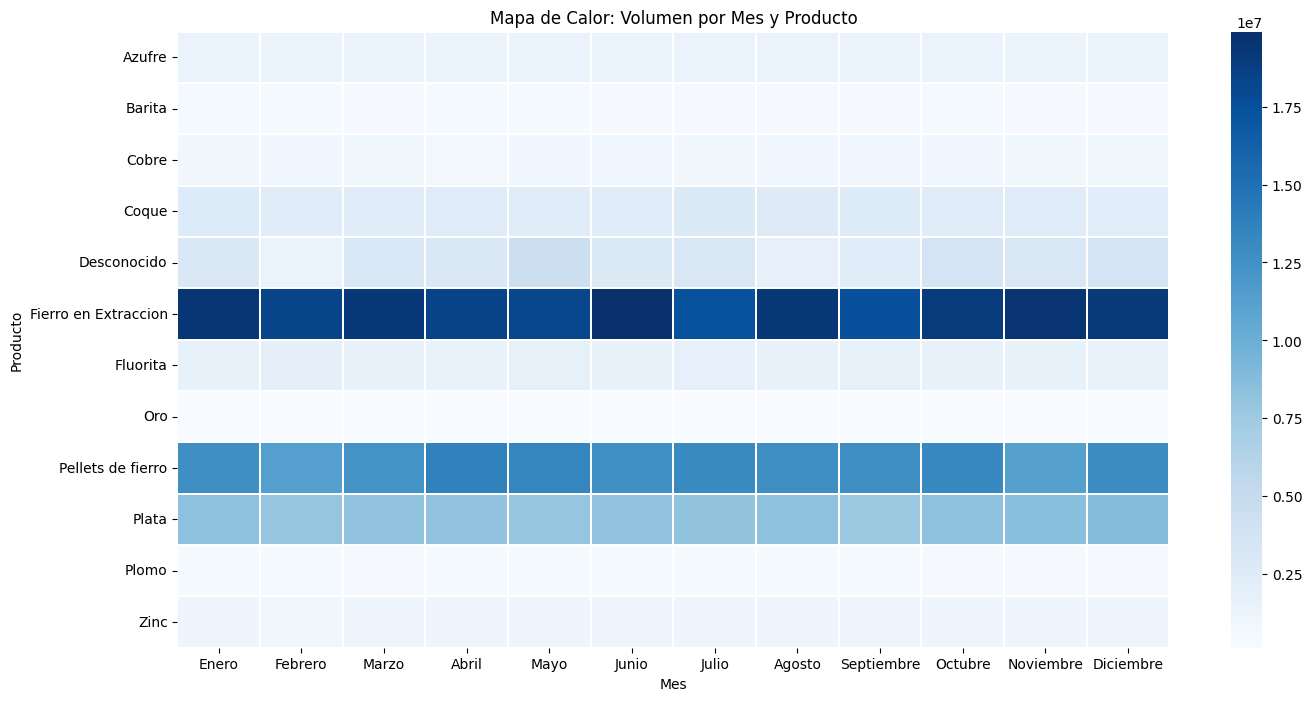

In [ ]:
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['MES'] = pd.Categorical(df['MES'], categories=orden_meses, ordered=True)

tabla = df.pivot_table(values="VOLUMEN", index="PRODUCTO", columns="MES", aggfunc="sum")

plt.figure(figsize=(16,8))
sns.heatmap(tabla, cmap="Blues", linewidths=0.3)
plt.title("Mapa de Calor: Volumen por Mes y Producto")
plt.xlabel("Mes")
plt.ylabel("Producto")
plt.show()


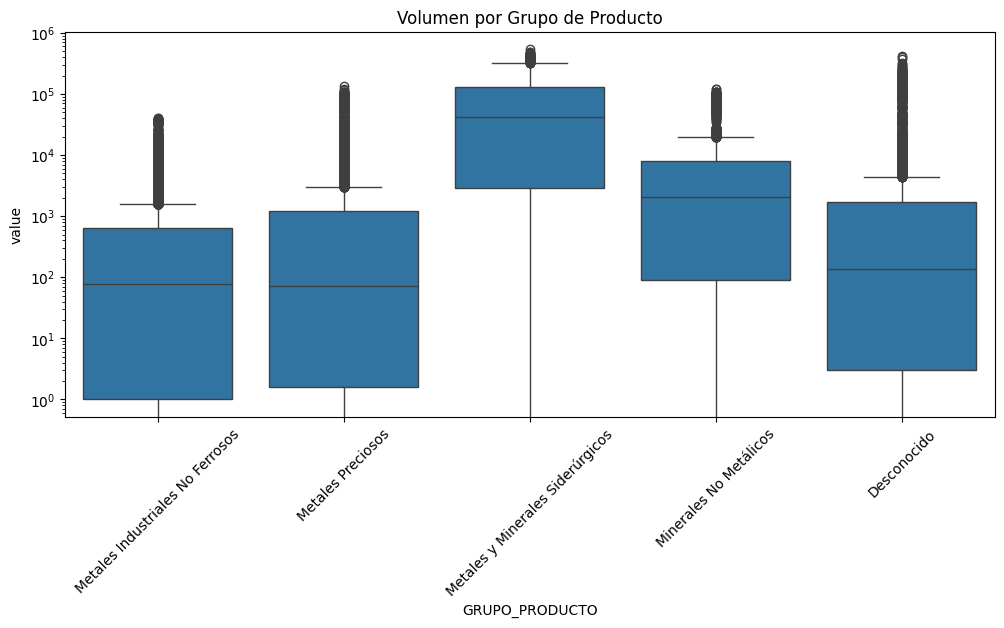

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='GRUPO_PRODUCTO', y='value', data=df)
plt.title("Volumen por Grupo de Producto")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

Parte 4: 

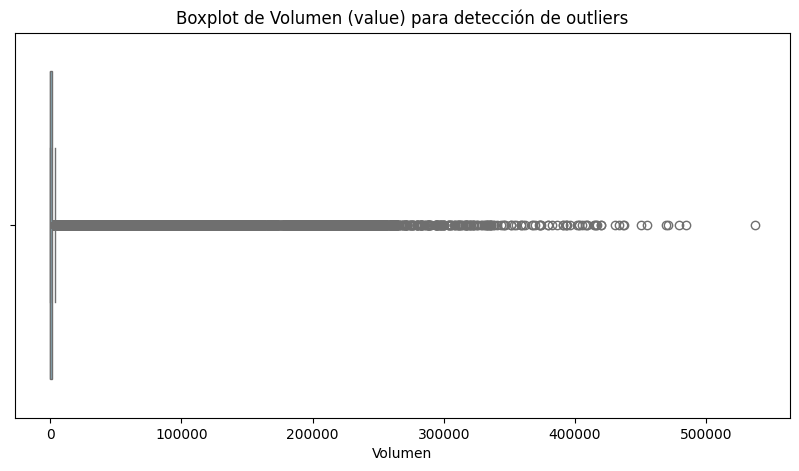

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['value'], color='skyblue')
plt.title("Boxplot de Volumen (value) para detección de outliers")
plt.xlabel("Volumen")
plt.show()


In [ ]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 2.0
Q3: 1615.5
IQR: 1613.5


In [ ]:
outliers = df[(df['value'] < (Q1 - 1.5 * IQR)) | 
              (df['value'] > (Q3 + 1.5 * IQR))]

print("Cantidad de outliers encontrados:", len(outliers))
outliers.head()


Cantidad de outliers encontrados: 14453


,COBERTURA,ANIO,MES,state,MUNICIPIO,GRUPO_PRODUCTO,PRODUCTO,UNIDAD_MEDIDA,value,ESTATUS
13,Municipal,2001.0,Enero,Coahuila De Zaragoza,Morelos,Metales y Minerales Siderúrgicos,Coque,Toneladas,7246.0,Cifras Definitivas.
15,Municipal,2001.0,Enero,Chiapas,Reforma,Minerales No Metálicos,Azufre,Toneladas,26195.0,Cifras Definitivas.
16,Municipal,2001.0,Enero,Colima,Concepción del Oro,Metales y Minerales Siderúrgicos,Pellets de fierro,Toneladas,180478.0,Cifras Definitivas.
20,Municipal,2001.0,Enero,Chihuahua,Desconocido,Metales Preciosos,Plata,Kilogramos,14779.0,Cifras Definitivas.
25,Municipal,2001.0,Enero,Chihuahua,Saucillo,Metales Preciosos,Plata,Kilogramos,12668.0,Cifras Definitivas.


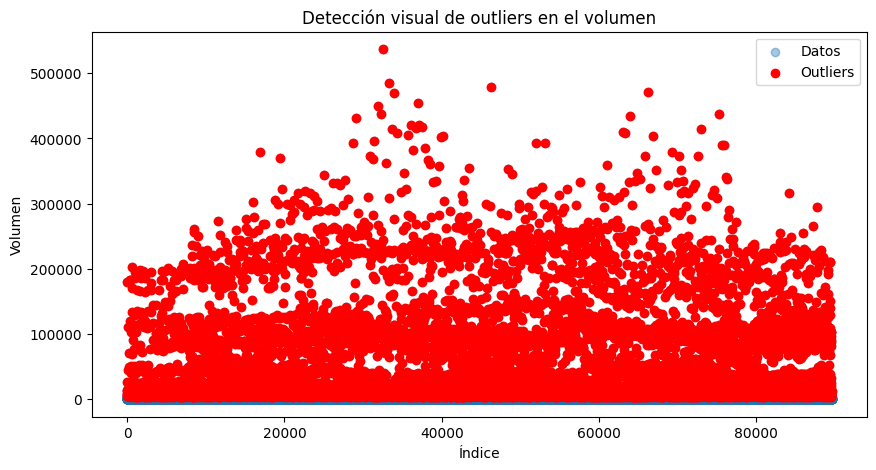

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(df)), df['value'], label='Datos', alpha=0.4)
plt.scatter(outliers.index, outliers['value'], color='red', label='Outliers')
plt.title("Detección visual de outliers en el volumen")
plt.xlabel("Índice")
plt.ylabel("Volumen")
plt.legend()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

Porcentaje de datos faltantes por columna:

COBERTURA         0.0
ANIO              0.0
MES               0.0
state             0.0
MUNICIPIO         0.0
GRUPO_PRODUCTO    0.0
PRODUCTO          0.0
UNIDAD_MEDIDA     0.0
value             0.0
ESTATUS           0.0
dtype: float64


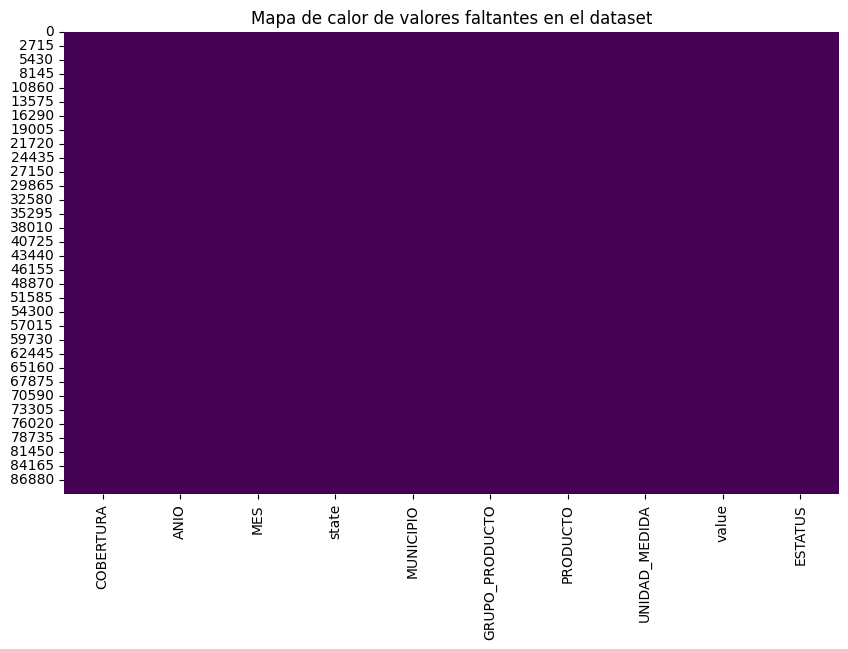

In [ ]:
faltantes_porcentaje = df.isna().sum() / len(df) * 100
print("Porcentaje de datos faltantes por columna:\n")
print(faltantes_porcentaje)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes en el dataset")
plt.show()


In [ ]:
df['value'] = df['value'].fillna(df['value'].median())
df['ANIO'] = df['ANIO'].fillna(df['ANIO'].median())


In [ ]:
columnas_categoricas = ['MES','state','MUNICIPIO','GRUPO_PRODUCTO','PRODUCTO','UNIDAD_MEDIDA','ESTATUS','COBERTURA']

for col in columnas_categoricas:
    df[col] = df[col].fillna(df[col].mode()[0])

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
print(df.columns)


Index(['COBERTURA', 'ANIO', 'MES', 'state', 'MUNICIPIO', 'GRUPO_PRODUCTO',
       'PRODUCTO', 'UNIDAD_MEDIDA', 'value', 'ESTATUS'],
      dtype='object')


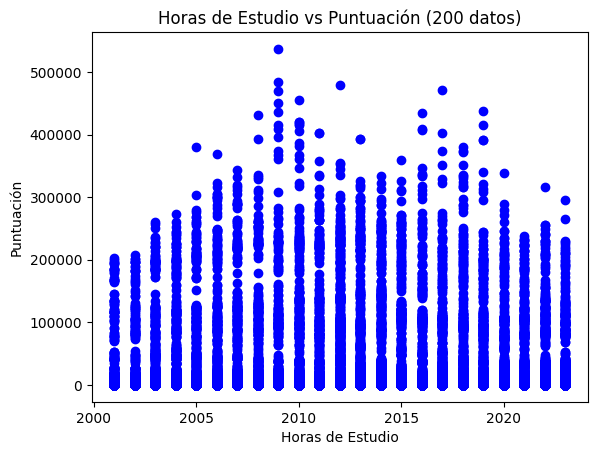

In [ ]:

plt.scatter(df['ANIO'], df['VOLUMEN'], color='blue')
plt.title('Horas de Estudio vs Puntuación (200 datos)')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación')
plt.show()

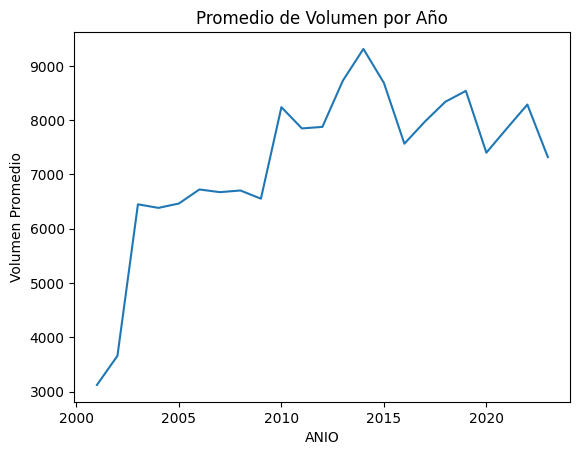

In [ ]:
df.groupby('ANIO')['VOLUMEN'].mean().plot(kind='line')
plt.title('Promedio de Volumen por Año')
plt.ylabel('Volumen Promedio')
plt.show()


In [ ]:
df_year = df.groupby('ANIO')['VOLUMEN'].mean().reset_index()


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df_year[['ANIO']]
y = df_year['VOLUMEN']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

modelo = LinearRegression()
modelo.fit(X_poly, y)

y_pred = modelo.predict(X_poly)


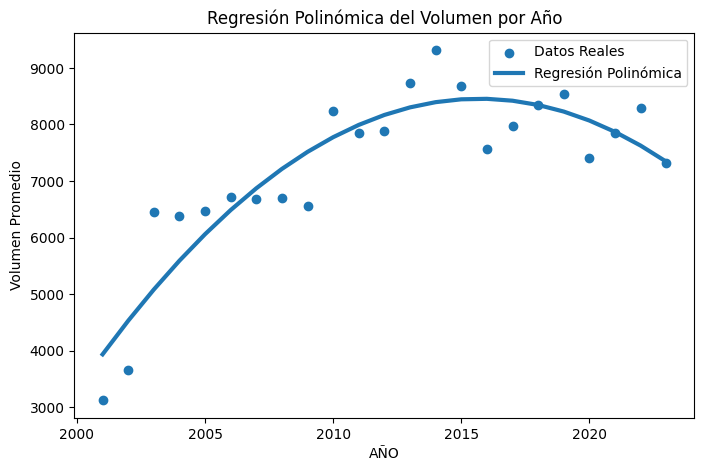

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df_year['ANIO'], df_year['VOLUMEN'], label='Datos Reales')
plt.plot(df_year['ANIO'], y_pred, label='Regresión Polinómica', linewidth=3)
plt.title('Regresión Polinómica del Volumen por Año')
plt.xlabel('AÑO')
plt.ylabel('Volumen Promedio')
plt.legend()
plt.show()


In [ ]:
df = df.sort_values(["ANIO", "MES"])  # Ordenar por tiempo

df["ALZA"] = (df["VOLUMEN"].shift(-1) > df["VOLUMEN"]).astype(int)


In [ ]:
X = df[["ANIO", "MES", "ESTADO", "GRUPO_PRODUCTO", "PRODUCTO", "VOLUMEN"]]
y = df["ALZA"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:
categoricas = ["MES", "ESTADO", "GRUPO_PRODUCTO", "PRODUCTO"]
numericas = ["ANIO", "VOLUMEN"]

preprocesamiento = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categoricas),
        ("num", "passthrough", numericas)
    ]
)


In [ ]:
modelo = Pipeline(steps=[
    ("preprocesamiento", preprocesamiento),
    ("clasificador", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        random_state=42
    ))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=False
)


In [ ]:
modelo.fit(X_train, y_train)


,steps,"[('preprocesamiento', ...), ('clasificador', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predicciones = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predicciones))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, predicciones))
print("\nReporte de clasificación:\n", classification_report(y_test, predicciones))


Accuracy: 0.7579105976896032

Matriz de confusión:
 [[6911 2204]
 [2134 6670]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      9115
           1       0.75      0.76      0.75      8804

    accuracy                           0.76     17919
   macro avg       0.76      0.76      0.76     17919
weighted avg       0.76      0.76      0.76     17919

